In [1]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/GPproject/gplib/')
import numpy as np
% load_ext autoreload
% autoreload 2
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
from gplib.gpc import GPCLaplace, GPCSparse
from gplib.covfun import SE

In [3]:
dim = 2
num = 200
test_num= 100
x_tr = np.random.rand(num, dim)
if dim == 1:
    x_test = np.linspace(0, 1, test_num)
    x_test = x_test.reshape(test_num, 1)
else:
    x_test = np.random.rand(test_num, dim)

In [4]:
data_gp = GPCLaplace(SE(np.array([1., .2, .1])))

In [5]:
y_tr, y_te = data_gp.generate_data(x_tr, x_test)

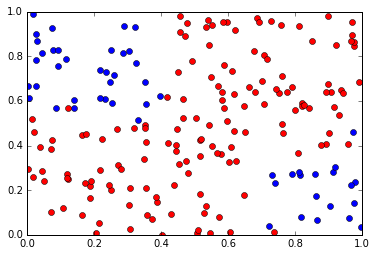

In [6]:
plt.plot(x_tr[y_tr[:, 0] == 1, 0], x_tr[y_tr[:, 0] == 1, 1], 'bo')
plt.plot(x_tr[y_tr[:, 0] == -1, 0], x_tr[y_tr[:, 0] == -1, 1], 'ro')

## Laplace

In [35]:
gp = GPCLaplace(SE(np.array([2., .5, .2])))

In [36]:
gp.fit(x_tr, y_tr, max_iter=10)

Iteration  0
Hyper-parameters at iteration  0 :  [ 1.98091039  0.40713973  0.16661261]


([array([ 1.98091039,  0.40713973,  0.16661261]),
  array([ 2.26189435,  0.33835752,  0.14058381]),
  array([ 2.98878067,  0.29762022,  0.10005031]),
  array([ 3.59238526,  0.26205742,  0.09007999]),
  array([ 3.96756352,  0.23162756,  0.09234737]),
  array([ 4.17327702,  0.20402162,  0.13168827]),
  array([ 4.07476576,  0.18794396,  0.0977584 ]),
  array([ 3.71108877,  0.16372879,  0.11112279]),
  array([ 3.78963506,  0.15264836,  0.09426979]),
  array([ 3.48783175,  0.14118879,  0.12487628])],
 [0.38850903511047363,
  0.7271380424499512,
  1.1673741340637207,
  1.536700963973999,
  2.082357168197632,
  2.5592880249023438,
  2.8925940990448,
  3.543760061264038,
  3.912933111190796,
  4.529102087020874])

In [37]:
y_pred = gp.predict(x_test, x_tr, y_tr)

In [38]:
np.sum(y_pred == y_te)

97

## Inducing Inputs
### svi

In [7]:
gp = GPCSparse(SE(np.array([1., .7, .2])), inputs=30)

In [8]:
options = {'hermgauss_deg': 100, 'mode': 'adadelta', 'maxiter': 100, 
           'verbose': True, 'batch_size':20, 'step_rate': 0.5, 'decay': 0.8,
           'print_freq': 10}
res = gp.fit(x_tr, y_tr, method='svi', method_options=options)

Using AdaDelta optimizer
Iteration  10 :
	Gradient norm 2.22224949054
Iteration  20 :
	Gradient norm 2.09777766627
Iteration  30 :
	Gradient norm 3.35295904039
Iteration  40 :
	Gradient norm 3.10968555511
Iteration  50 :
	Gradient norm 3.41012247859
Iteration  60 :
	Gradient norm 2.26286852108
Iteration  70 :
	Gradient norm 2.77656053015
Iteration  80 :
	Gradient norm 2.48995893457
Iteration  90 :
	Gradient norm 2.87380266316
Iteration  100 :
	Gradient norm 2.51570278785


In [9]:
y_pred = gp.predict(x_test)

In [10]:
np.sum(y_pred == y_te)

94

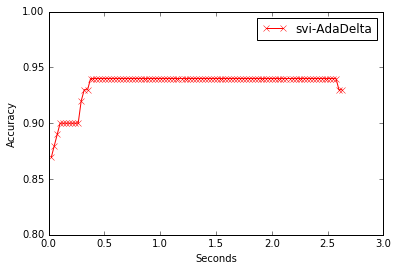

In [12]:
metric = lambda w: gp.get_prediction_quality(w, x_test, y_te)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-rx', label='svi-AdaDelta')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi_jj

In [13]:
gp = GPCSparse(SE(np.array([1., .7, .2])), inputs=30)

In [14]:
options = {'maxfun': 5, 'disp': False, 'mydisp': True, 'num_updates':5}
res = gp.fit(x_tr, y_tr, method='vi_jj', method_options=options)

Hyper-parameters at iteration 0 : [ 1.   0.7  0.2]
Hyper-parameters at iteration 1 : [ 5.67347996  0.57886797  0.1666448 ]
Hyper-parameters at iteration 2 : [ 5.39391194  0.45777958  0.10582451]
Hyper-parameters at iteration 3 : [ 5.01506708  0.41447177  0.01      ]
	Hyper-parameters at outter iteration 0 : [ 4.80456826  0.44115249  0.01      ]
Hyper-parameters at iteration 0 : [ 4.80456826  0.44115249  0.01      ]
Hyper-parameters at iteration 1 : [ 4.80147208  0.39740808  0.01      ]
Hyper-parameters at iteration 2 : [ 4.7999828   0.39893089  0.01      ]
	Hyper-parameters at outter iteration 1 : [ 4.79583633  0.39996448  0.01      ]
Hyper-parameters at iteration 0 : [ 4.79583633  0.39996448  0.01      ]
Hyper-parameters at iteration 1 : [ 4.80618721  0.37252763  0.01      ]
Hyper-parameters at iteration 2 : [ 4.80314656  0.37945217  0.01      ]
	Hyper-parameters at outter iteration 2 : [ 4.80287865  0.3791082   0.01      ]
Hyper-parameters at iteration 0 : [ 4.80287865  0.3791082   0

In [15]:
y_pred = gp.predict(x_test)

In [16]:
np.sum(y_pred == y_te)

93

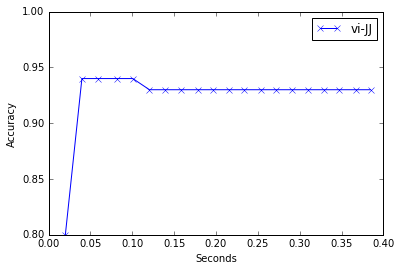

In [17]:
metric = lambda w: gp.get_prediction_quality(w, x_test, y_te)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-bx', label='vi-JJ')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')